In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load dataset
df = pd.read_csv("cafe_clustered_data.csv")

# Create binary target: 1 = High Spender, 0 = Low Spender
df['HighSpender'] = (df['Total Spent'] > 10).astype(int)

# Drop the original Total Spent since it's now converted
df.drop('Total Spent', axis=1, inplace=True)

# Convert boolean columns to 0/1
df = df.replace({True: 1, False: 0})


C:\Users\navee\AppData\Local\Temp\ipykernel_18972\1920548068.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [3]:
# Choose features (exclude target and non-numeric like cluster if needed)
X = df.drop(['HighSpender'], axis=1)
y = df['HighSpender']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


✅ Accuracy: 0.9812814974802015
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       913
           1       0.98      0.97      0.97       476

    accuracy                           0.98      1389
   macro avg       0.98      0.98      0.98      1389
weighted avg       0.98      0.98      0.98      1389



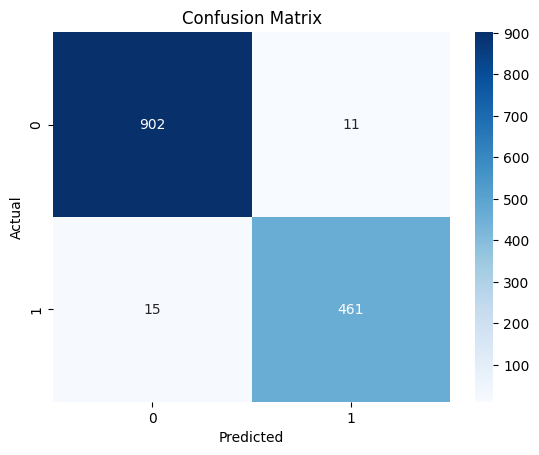

In [6]:
# Predict
y_pred = model.predict(X_test)

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


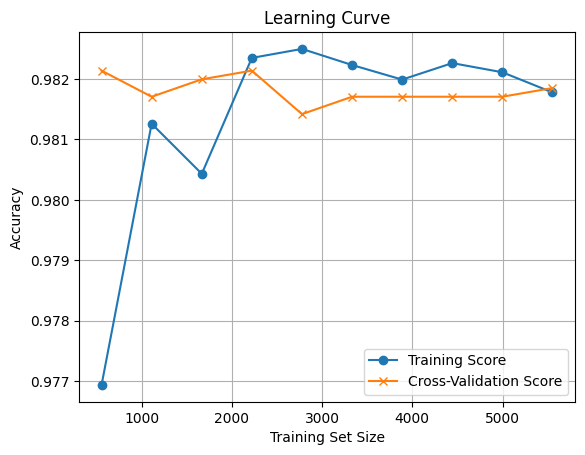

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

# Model
model = LogisticRegression(max_iter=1000)

# Learning curve function
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y,
    cv=StratifiedKFold(n_splits=5),
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

# Calculate average scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', marker='x')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [8]:
from sklearn.linear_model import LogisticRegressionCV

# Logistic Regression with cross-validated regularization
model_cv = LogisticRegressionCV(
    Cs=10,           # Try 10 values of C
    cv=5,            # 5-fold cross-validation
    max_iter=1000,
    scoring='accuracy'
)

model_cv.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import accuracy_score

y_pred_cv = model_cv.predict(X_test)
print("✅ Accuracy after tuning:", accuracy_score(y_test, y_pred_cv))


✅ Accuracy after tuning: 0.980561555075594


📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       913
           1       0.98      0.97      0.97       476

    accuracy                           0.98      1389
   macro avg       0.98      0.98      0.98      1389
weighted avg       0.98      0.98      0.98      1389



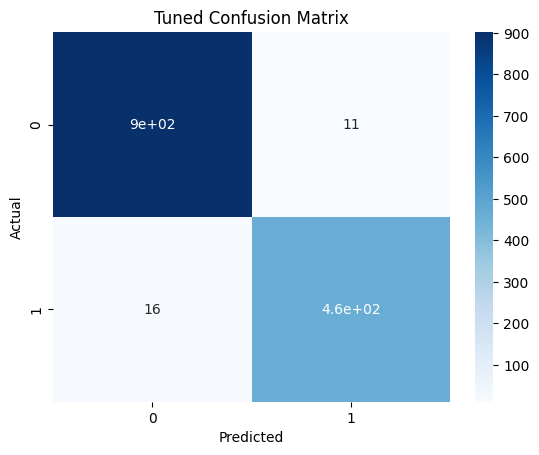

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

print("📋 Classification Report:\n", classification_report(y_test, y_pred_cv))

conf_matrix = confusion_matrix(y_test, y_pred_cv)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tuned Confusion Matrix")
plt.show()
